In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [531]:
import warnings
warnings.filterwarnings("ignore")

In [532]:
#!pip install pyspark
import pyspark

In [533]:
from pyspark.sql import SparkSession

In [534]:
spark = SparkSession.builder.appName("Final_Project").getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

In [535]:
spark

In [536]:
# loading the datasets

match = spark.read.option("header","true").csv("match.csv", inferSchema = True)

delivery = spark.read.option("header","true").csv("deliveries.csv", inferSchema = True)

 Infer schema will automatically guess the data types for each field.

In [537]:
match.printSchema(),delivery.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Season: string (nullable = true)
 |-- MatchNumber: string (nullable = true)
 |-- Team1: string (nullable = true)
 |-- Team2: string (nullable = true)
 |-- Venue: string (nullable = true)
 |-- TossWinner: string (nullable = true)
 |-- TossDecision: string (nullable = true)
 |-- SuperOver: string (nullable = true)
 |-- WinningTeam: string (nullable = true)
 |-- WonBy: string (nullable = true)
 |-- Margin: string (nullable = true)
 |-- method: string (nullable = true)
 |-- Player_of_Match: string (nullable = true)
 |-- Team1Players: string (nullable = true)
 |-- Team2Players: string (nullable = true)
 |-- Umpire1: string (nullable = true)
 |-- Umpire2: string (nullable = true)

root
 |-- ID: integer (nullable = true)
 |-- innings: integer (nullable = true)
 |-- overs: integer (nullable = true)
 |-- ballnumber: integer (nullable = true)
 |-- batter: string (nullable = tru

(None, None)

In [538]:
print(match.count(), len(match.columns))

950 20


In [539]:
print(delivery.count(), len(delivery.columns))

225954 17


In [540]:
match.cache(),delivery.cache()

(DataFrame[ID: int, City: string, Date: timestamp, Season: string, MatchNumber: string, Team1: string, Team2: string, Venue: string, TossWinner: string, TossDecision: string, SuperOver: string, WinningTeam: string, WonBy: string, Margin: string, method: string, Player_of_Match: string, Team1Players: string, Team2Players: string, Umpire1: string, Umpire2: string],
 DataFrame[ID: int, innings: int, overs: int, ballnumber: int, batter: string, bowler: string, non-striker: string, extra_type: string, batsman_run: int, extras_run: int, total_run: int, non_boundary: int, isWicketDelivery: int, player_out: string, kind: string, fielders_involved: string, BattingTeam: string])

In [541]:
match.toPandas()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NA,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NA,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NA,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NA,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NA,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5,NA,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5,NA,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9,NA,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33,NA,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [542]:
delivery.toPandas()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


## Exploratory Data Analysis

In [543]:
# creating copies of original datarames


match1 = match.select("*")

#delivery1 = delivery.select("*")

In [544]:
delivery1 = delivery.select("*")

In [545]:
match1.toPandas()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NA,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NA,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NA,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NA,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NA,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5,NA,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5,NA,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9,NA,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33,NA,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [546]:
delivery.toPandas()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


In [547]:
match1.columns

['ID',
 'City',
 'Date',
 'Season',
 'MatchNumber',
 'Team1',
 'Team2',
 'Venue',
 'TossWinner',
 'TossDecision',
 'SuperOver',
 'WinningTeam',
 'WonBy',
 'Margin',
 'method',
 'Player_of_Match',
 'Team1Players',
 'Team2Players',
 'Umpire1',
 'Umpire2']

In [548]:
delivery1.columns

['ID',
 'innings',
 'overs',
 'ballnumber',
 'batter',
 'bowler',
 'non-striker',
 'extra_type',
 'batsman_run',
 'extras_run',
 'total_run',
 'non_boundary',
 'isWicketDelivery',
 'player_out',
 'kind',
 'fielders_involved',
 'BattingTeam']

In [549]:
total_score_df = delivery.groupby('ID','innings').sum('total_run')

In [550]:
total_score_df.columns

['ID', 'innings', 'sum(total_run)']

In [551]:
total_score_df = total_score_df.withColumnRenamed('sum(total_run)','total_run')

In [552]:
total_score_df.columns

['ID', 'innings', 'total_run']

In [553]:
import pyspark.sql.functions as f
import pyspark.sql.types as T

In [554]:
total_score_df.show()

+-------+-------+---------+
|     ID|innings|total_run|
+-------+-------+---------+
|1304115|      1|      159|
|1304102|      1|      165|
|1304097|      2|      172|
|1254077|      3|        7|
|1254065|      2|      107|
|1216512|      4|        3|
|1178401|      2|      180|
|1136619|      2|      160|
|1304065|      2|      171|
|1304072|      1|      199|
|1216530|      2|      131|
|1175365|      2|      185|
|1136616|      1|      153|
|1304069|      1|      198|
|1254097|      1|      154|
|1216528|      1|      167|
|1216511|      1|      193|
|1216544|      1|      145|
|1181767|      1|      147|
|1178431|      1|      133|
+-------+-------+---------+
only showing top 20 rows



In [555]:
total_score_df = total_score_df[total_score_df.innings==1]

In [556]:
total_score_df.show()

+-------+-------+---------+
|     ID|innings|total_run|
+-------+-------+---------+
|1304115|      1|      159|
|1304102|      1|      165|
|1304072|      1|      199|
|1136616|      1|      153|
|1304069|      1|      198|
|1254097|      1|      154|
|1216528|      1|      167|
|1216511|      1|      193|
|1216544|      1|      145|
|1181767|      1|      147|
|1178431|      1|      133|
|1178398|      1|      108|
|1304101|      1|      208|
|1216492|      1|      162|
|1304089|      1|      170|
|1237180|      1|      189|
|1216513|      1|      178|
|1216501|      1|      167|
|1304047|      1|      131|
|1216516|      1|      164|
+-------+-------+---------+
only showing top 20 rows



In [557]:
total_score_df = total_score_df.withColumnRenamed('ID','ID_D')

In [558]:
match2 = match1.join(total_score_df.select('ID_D','total_run'),match1.ID == total_score_df.ID_D,"inner")

In [559]:
match2.cache()

DataFrame[ID: int, City: string, Date: timestamp, Season: string, MatchNumber: string, Team1: string, Team2: string, Venue: string, TossWinner: string, TossDecision: string, SuperOver: string, WinningTeam: string, WonBy: string, Margin: string, method: string, Player_of_Match: string, Team1Players: string, Team2Players: string, Umpire1: string, Umpire2: string, ID_D: int, total_run: bigint]

In [560]:
print(match2.count(),len(match2.columns))

950 22


In [561]:
match2.toPandas().head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,ID_D,total_run
0,1082626,Chandigarh,2017-04-30,2017,36,Kings XI Punjab,Delhi Daredevils,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,field,...,Wickets,10,NA,Sandeep Sharma,"['MJ Guptill', 'HM Amla', 'M Vohra', 'SE Marsh...","['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...",YC Barde,CK Nandan,1082626,67
1,829711,Chennai,2015-04-11,2015,4,Chennai Super Kings,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,...,Runs,45,NA,BB McCullum,"['DR Smith', 'BB McCullum', 'SK Raina', 'MS Dh...","['DA Warner', 'S Dhawan', 'KL Rahul', 'NV Ojha...",RK Illingworth,VA Kulkarni,829711,209
2,734021,Hyderabad,2014-05-20,2014,46,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,bat,...,Wickets,7,NA,DA Warner,"['S Dhawan', 'DA Warner', 'NV Ojha', 'AJ Finch...","['CH Gayle', 'PA Patel', 'V Kohli', 'Yuvraj Si...",AK Chaudhary,NJ Llong,734021,160
3,733997,Cuttack,2014-05-11,2014,34,Kings XI Punjab,Kolkata Knight Riders,Barabati Stadium,Kolkata Knight Riders,field,...,Wickets,9,NA,G Gambhir,"['V Sehwag', 'Mandeep Singh', 'WP Saha', 'GJ M...","['RV Uthappa', 'G Gambhir', 'MK Pandey', 'JH K...",NJ Llong,CK Nandan,733997,149
4,501203,Kolkata,2011-04-11,2011,6,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Kolkata Knight Riders,bat,...,Runs,9,NA,JH Kallis,"['JH Kallis', 'MS Bisla', 'G Gambhir', 'MK Tiw...","['S Dhawan', 'IR Jaggi', 'B Chipli', 'KC Sanga...",RE Koertzen,SK Tarapore,501203,163
5,419132,Mumbai,2010-03-30,2009/10,27,Mumbai Indians,Kings XI Punjab,Brabourne Stadium,Mumbai Indians,field,...,Wickets,4,NA,SL Malinga,"['S Dhawan', 'SR Tendulkar', 'KA Pollard', 'SS...","['RS Bopara', 'SE Marsh', 'MS Bisla', 'DPMD Ja...",BR Doctrove,SK Tarapore,419132,163
6,392196,Durban,2009-04-27,2009,16,Chennai Super Kings,Deccan Chargers,Kingsmead,Deccan Chargers,field,...,Wickets,6,NA,HH Gibbs,"['PA Patel', 'ML Hayden', 'SK Raina', 'MS Dhon...","['AC Gilchrist', 'HH Gibbs', 'VVS Laxman', 'RG...",IL Howell,TH Wijewardene,392196,165
7,336009,Delhi,2008-05-08,2007/08,28,Delhi Daredevils,Chennai Super Kings,Feroz Shah Kotla,Chennai Super Kings,field,...,Wickets,4,NA,MS Dhoni,"['G Gambhir', 'V Sehwag', 'AB de Villiers', 'S...","['S Vidyut', 'SP Fleming', 'MS Dhoni', 'SK Rai...",Aleem Dar,RB Tiffin,336009,187
8,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,Wickets,5,NA,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma,1304115,159
9,1304102,Navi Mumbai,2022-05-09,2022,56,Kolkata Knight Riders,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",Mumbai Indians,field,...,Runs,52,NA,JJ Bumrah,"['VR Iyer', 'AM Rahane', 'N Rana', 'SS Iyer', ...","['RG Sharma', 'Ishan Kishan', 'Tilak Varma', '...",CB Gaffaney,GR Sadashiv Iyer,1304102,165


In [562]:
match2.select('Team1').distinct().show(truncate=False)

+---------------------------+
|Team1                      |
+---------------------------+
|Sunrisers Hyderabad        |
|Chennai Super Kings        |
|Kolkata Knight Riders      |
|Kings XI Punjab            |
|Delhi Daredevils           |
|Mumbai Indians             |
|Delhi Capitals             |
|Lucknow Super Giants       |
|Rajasthan Royals           |
|Punjab Kings               |
|Royal Challengers Bangalore|
|Deccan Chargers            |
|Gujarat Lions              |
|Rising Pune Supergiant     |
|Pune Warriors              |
|Kochi Tuskers Kerala       |
|Gujarat Titans             |
|Rising Pune Supergiants    |
+---------------------------+



In [563]:
teams = ['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [564]:
from pyspark.sql.functions import regexp_replace

In [565]:
match2=match2.withColumn('Team1',regexp_replace('Team1','Delhi Daredevils','Delhi Capitals'))
match2=match2.withColumn('Team2',regexp_replace('Team2','Delhi Daredevils','Delhi Capitals'))

match2=match2.withColumn('Team1',regexp_replace('Team1','Deccan Chargers','Sunrisers Hyderabad'))
match2=match2.withColumn('Team2',regexp_replace('Team2','Deccan Chargers','Sunrisers Hyderabad'))

match2=match2.withColumn('Team1',regexp_replace('Team1','Kings XI Punjab','Punjab Kings'))
match2=match2.withColumn('Team2',regexp_replace('Team2','Kings XI Punjab','Punjab Kings'))

In [566]:
match2.select('Team1').distinct().show(truncate=False)

+---------------------------+
|Team1                      |
+---------------------------+
|Sunrisers Hyderabad        |
|Chennai Super Kings        |
|Kolkata Knight Riders      |
|Punjab Kings               |
|Delhi Capitals             |
|Mumbai Indians             |
|Lucknow Super Giants       |
|Rajasthan Royals           |
|Royal Challengers Bangalore|
|Gujarat Lions              |
|Rising Pune Supergiant     |
|Pune Warriors              |
|Kochi Tuskers Kerala       |
|Gujarat Titans             |
|Rising Pune Supergiants    |
+---------------------------+



In [567]:
match2=match2[match2.Team1.isin(teams)]
match2=match2[match2.Team2.isin(teams)]

delivery2 = delivery1[delivery1.BattingTeam.isin(teams)]

In [568]:
print(match2.count(),len(match2.columns))

835 22


In [569]:
match2 = match2.withColumnRenamed('ID','ID_M')

In [570]:
match2 = match2.withColumnRenamed('total_run','target_score')

In [571]:
match2 = match2.withColumn("target_score", match2.target_score + 1)

In [572]:
match2.toPandas().head()

,ID_M,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,ID_D,target_score
0,1082626,Chandigarh,2017-04-30,2017,36,Punjab Kings,Delhi Capitals,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,field,...,Wickets,10,NA,Sandeep Sharma,"['MJ Guptill', 'HM Amla', 'M Vohra', 'SE Marsh...","['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...",YC Barde,CK Nandan,1082626,68
1,829711,Chennai,2015-04-11,2015,4,Chennai Super Kings,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,...,Runs,45,NA,BB McCullum,"['DR Smith', 'BB McCullum', 'SK Raina', 'MS Dh...","['DA Warner', 'S Dhawan', 'KL Rahul', 'NV Ojha...",RK Illingworth,VA Kulkarni,829711,210
2,734021,Hyderabad,2014-05-20,2014,46,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,bat,...,Wickets,7,NA,DA Warner,"['S Dhawan', 'DA Warner', 'NV Ojha', 'AJ Finch...","['CH Gayle', 'PA Patel', 'V Kohli', 'Yuvraj Si...",AK Chaudhary,NJ Llong,734021,161
3,733997,Cuttack,2014-05-11,2014,34,Punjab Kings,Kolkata Knight Riders,Barabati Stadium,Kolkata Knight Riders,field,...,Wickets,9,NA,G Gambhir,"['V Sehwag', 'Mandeep Singh', 'WP Saha', 'GJ M...","['RV Uthappa', 'G Gambhir', 'MK Pandey', 'JH K...",NJ Llong,CK Nandan,733997,150
4,501203,Kolkata,2011-04-11,2011,6,Kolkata Knight Riders,Sunrisers Hyderabad,Eden Gardens,Kolkata Knight Riders,bat,...,Runs,9,NA,JH Kallis,"['JH Kallis', 'MS Bisla', 'G Gambhir', 'MK Tiw...","['S Dhawan', 'IR Jaggi', 'B Chipli', 'KC Sanga...",RE Koertzen,SK Tarapore,501203,164


In [573]:
match2 = match2[match2.method!='D/L']

In [574]:
print(match2.count(),len(match2.columns))

820 22


In [575]:
match2 = match2['ID_M','City','WinningTeam','target_score','Team1', 'Team2']

In [576]:
match2.toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2
0,1082626,Chandigarh,Kings XI Punjab,68,Punjab Kings,Delhi Capitals
1,829711,Chennai,Chennai Super Kings,210,Chennai Super Kings,Sunrisers Hyderabad
2,734021,Hyderabad,Sunrisers Hyderabad,161,Sunrisers Hyderabad,Royal Challengers Bangalore
3,733997,Cuttack,Kolkata Knight Riders,150,Punjab Kings,Kolkata Knight Riders
4,501203,Kolkata,Kolkata Knight Riders,164,Kolkata Knight Riders,Sunrisers Hyderabad
...,...,...,...,...,...,...
815,392225,Durban,Rajasthan Royals,146,Mumbai Indians,Rajasthan Royals
816,1216496,NA,Rajasthan Royals,217,Rajasthan Royals,Chennai Super Kings
817,1136577,Pune,Chennai Super Kings,205,Chennai Super Kings,Rajasthan Royals
818,734027,Kolkata,Kolkata Knight Riders,196,Kolkata Knight Riders,Royal Challengers Bangalore


In [577]:
delivery2.toPandas()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161412,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
161413,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
161414,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
161415,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


In [578]:
delivery2 = match2.join(delivery2,match2.ID_M==delivery2.ID,"inner")

In [579]:
delivery2.cache()

DataFrame[ID_M: int, City: string, WinningTeam: string, target_score: bigint, Team1: string, Team2: string, ID: int, innings: int, overs: int, ballnumber: int, batter: string, bowler: string, non-striker: string, extra_type: string, batsman_run: int, extras_run: int, total_run: int, non_boundary: int, isWicketDelivery: int, player_out: string, kind: string, fielders_involved: string, BattingTeam: string]

In [580]:
print(delivery2.count(),len(delivery2.columns))

151092 23


In [581]:
delivery2.toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,1,...,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,2,...,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,3,...,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,4,...,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,5,...,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151087,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,14,5,...,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
151088,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,14,6,...,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
151089,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,14,7,...,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
151090,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,15,1,...,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


In [582]:
delivery2 = delivery2[delivery2.innings==2]

In [583]:
from pyspark.sql.window import Window
import sys

windowval=Window.partitionBy('ID_M').rowsBetween(-sys.maxsize, 0)

In [584]:
delivery2 = delivery2.withColumn('current_score',f.sum('total_run').over(windowval))

In [585]:
delivery2 = delivery2.withColumn('runs_left',((delivery2['target_score'])-delivery2['current_score']))

In [586]:
delivery2.toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore,1,222
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore,3,220
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore,4,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,0,1,0,0,NA,NA,NA,Rajasthan Royals,151,7
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,0,1,0,0,NA,NA,NA,Rajasthan Royals,152,6
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,0,2,0,0,NA,NA,NA,Rajasthan Royals,154,4
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,0,1,0,0,NA,NA,NA,Rajasthan Royals,155,3


In [587]:
delivery2.withColumn('balls_left',126-(((delivery2['overs']+1)*6)+delivery2['ballnumber'])).toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,1,222,119
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221,118
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,0,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221,117
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,3,220,116
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,1,0,0,NA,NA,NA,Rajasthan Royals,151,7,15
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,1,0,0,NA,NA,NA,Rajasthan Royals,152,6,14
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,2,0,0,NA,NA,NA,Rajasthan Royals,154,4,13
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,1,0,0,NA,NA,NA,Rajasthan Royals,155,3,12


In [588]:
delivery2 = delivery2.withColumn('balls_left',126-(((delivery2['overs']+1)*6)+delivery2['ballnumber']))

In [589]:
delivery2.groupby('ID_M').sum('isWicketDelivery').toPandas()

,ID_M,sum(isWicketDelivery)
0,1254081,3
1,1304099,10
2,1304102,10
3,1254064,7
4,1181764,4
...,...,...
622,336012,1
623,392185,10
624,336011,2
625,336028,10


In [590]:
delivery2 = delivery2.withColumn('wickets',f.sum('isWicketDelivery').over(windowval))

In [591]:
delivery2.withColumn('wickets_left',(10-f.col('wickets')))

DataFrame[ID_M: int, City: string, WinningTeam: string, target_score: bigint, Team1: string, Team2: string, ID: int, innings: int, overs: int, ballnumber: int, batter: string, bowler: string, non-striker: string, extra_type: string, batsman_run: int, extras_run: int, total_run: int, non_boundary: int, isWicketDelivery: int, player_out: string, kind: string, fielders_involved: string, BattingTeam: string, current_score: bigint, runs_left: bigint, balls_left: int, wickets: bigint, wickets_left: bigint]

In [592]:
delivery2 = delivery2.withColumn('wickets_left',(10-f.col('wickets')))

In [593]:
delivery2.toPandas().tail(10)

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,wickets_left
72753,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,16,4,...,0,NA,NA,NA,Rajasthan Royals,148,10,20,2,8
72754,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,16,5,...,1,D Padikkal,caught,KD Karthik,Rajasthan Royals,148,10,19,3,7
72755,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,16,6,...,0,NA,NA,NA,Rajasthan Royals,148,10,18,3,7
72756,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,1,...,0,NA,NA,NA,Rajasthan Royals,149,9,17,3,7
72757,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,2,...,0,NA,NA,NA,Rajasthan Royals,150,8,16,3,7
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,0,NA,NA,NA,Rajasthan Royals,151,7,15,3,7
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,0,NA,NA,NA,Rajasthan Royals,152,6,14,3,7
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,0,NA,NA,NA,Rajasthan Royals,154,4,13,3,7
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,0,NA,NA,NA,Rajasthan Royals,155,3,12,3,7
72762,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,18,1,...,0,NA,NA,NA,Rajasthan Royals,161,-3,11,3,7


In [594]:
delivery2 = delivery2.drop('wickets')

In [595]:
delivery2 = delivery2.withColumn('current_run_rate',((delivery2['current_score']/(120-delivery2['balls_left']))*6))

In [596]:
delivery2 = delivery2.withColumn('required_run_rate', ((delivery2['runs_left'] * 6)/delivery2['balls_left']))

In [597]:
from pyspark.sql.types import IntegerType,StringType
from pyspark.sql.functions import udf,col

In [598]:
def BowlingTeam(Team1,Team2,BattingTeam):
    if Team2== BattingTeam:
        return Team1
    else:
        return Team2

In [599]:
spark.udf.register(name='BowlingTeam',f=BowlingTeam,returnType=StringType())

<function __main__.BowlingTeam(Team1, Team2, BattingTeam)>

In [600]:
delivery2.createOrReplaceTempView('delivery')

In [601]:
spark.sql('select *, BowlingTeam(Team1,Team2,BattingTeam) as BowlingTeam from delivery').toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,BowlingTeam
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,NA,NA,Royal Challengers Bangalore,1,222,119,10,6.000000,11.193277,Kolkata Knight Riders
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,NA,NA,Royal Challengers Bangalore,2,221,118,10,6.000000,11.237288,Kolkata Knight Riders
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,NA,NA,Royal Challengers Bangalore,2,221,117,10,4.000000,11.333333,Kolkata Knight Riders
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,NA,NA,Royal Challengers Bangalore,3,220,116,10,4.500000,11.379310,Kolkata Knight Riders
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,NA,NA,Royal Challengers Bangalore,4,219,115,10,4.800000,11.426087,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,NA,NA,Rajasthan Royals,151,7,15,7,8.628571,2.800000,Royal Challengers Bangalore
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,NA,NA,Rajasthan Royals,152,6,14,7,8.603774,2.571429,Royal Challengers Bangalore
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,NA,NA,Rajasthan Royals,154,4,13,7,8.635514,1.846154,Royal Challengers Bangalore
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,NA,NA,Rajasthan Royals,155,3,12,7,8.611111,1.500000,Royal Challengers Bangalore


In [602]:
delivery2 = spark.sql('select *, BowlingTeam(Team1,Team2,BattingTeam) as BowlingTeam from delivery')

In [603]:
# to check if the batting team and bowling teams are different in each row

delivery2[delivery2.BattingTeam == delivery2.BowlingTeam].toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,BowlingTeam


In [604]:
delivery2.createOrReplaceTempView('delivery')

In [605]:
def result(BattingTeam,WinningTeam):
    return 1 if BattingTeam == WinningTeam else 0

In [606]:
spark.udf.register(name='result', f = result, returnType=IntegerType())

<function __main__.result(BattingTeam, WinningTeam)>

In [607]:
spark.sql('select *,result(BattingTeam,WinningTeam) as result from delivery').toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,BowlingTeam,result
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,NA,Royal Challengers Bangalore,1,222,119,10,6.000000,11.193277,Kolkata Knight Riders,0
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,NA,Royal Challengers Bangalore,2,221,118,10,6.000000,11.237288,Kolkata Knight Riders,0
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,NA,Royal Challengers Bangalore,2,221,117,10,4.000000,11.333333,Kolkata Knight Riders,0
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,NA,Royal Challengers Bangalore,3,220,116,10,4.500000,11.379310,Kolkata Knight Riders,0
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,NA,Royal Challengers Bangalore,4,219,115,10,4.800000,11.426087,Kolkata Knight Riders,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,NA,Rajasthan Royals,151,7,15,7,8.628571,2.800000,Royal Challengers Bangalore,1
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,NA,Rajasthan Royals,152,6,14,7,8.603774,2.571429,Royal Challengers Bangalore,1
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,NA,Rajasthan Royals,154,4,13,7,8.635514,1.846154,Royal Challengers Bangalore,1
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,NA,Rajasthan Royals,155,3,12,7,8.611111,1.500000,Royal Challengers Bangalore,1


In [608]:
delivery2 = spark.sql('select *,result(BattingTeam,WinningTeam) as result from delivery')

In [609]:
delivery2.columns

['ID_M',
 'City',
 'WinningTeam',
 'target_score',
 'Team1',
 'Team2',
 'ID',
 'innings',
 'overs',
 'ballnumber',
 'batter',
 'bowler',
 'non-striker',
 'extra_type',
 'batsman_run',
 'extras_run',
 'total_run',
 'non_boundary',
 'isWicketDelivery',
 'player_out',
 'kind',
 'fielders_involved',
 'BattingTeam',
 'current_score',
 'runs_left',
 'balls_left',
 'wickets_left',
 'current_run_rate',
 'required_run_rate',
 'BowlingTeam',
 'result']

In [610]:
delivery2 = delivery2.drop('ID_M',
 'WinningTeam',
 'Team1',
 'Team2',
 'ID', 'total_run', 'current_score', 
 'innings',
 'overs',
 'ballnumber',
 'batter',
 'bowler',
 'non-striker',
 'extra_type',
 'batsman_run',
 'extras_run',
 'total_run_y',
 'non_boundary',
 'isWicketDelivery',
 'player_out',
 'kind',
 'fielders_involved')

In [611]:
delivery2.columns

['City',
 'target_score',
 'BattingTeam',
 'runs_left',
 'balls_left',
 'wickets_left',
 'current_run_rate',
 'required_run_rate',
 'BowlingTeam',
 'result']

In [612]:
delivery2 = delivery2.withColumnRenamed('City', 'city')

delivery2 = delivery2.withColumnRenamed('BattingTeam', 'batting_team')

delivery2 = delivery2.withColumnRenamed('BowlingTeam', 'bowling_team')

In [613]:
delivery2.columns

['city',
 'target_score',
 'batting_team',
 'runs_left',
 'balls_left',
 'wickets_left',
 'current_run_rate',
 'required_run_rate',
 'bowling_team',
 'result']

In [614]:
from pyspark.sql.functions import col,isnan,when,count

In [615]:
delivery2_col = delivery2.columns

In [616]:
delivery2.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in delivery2_col]).show()

+----+------------+------------+---------+----------+------------+----------------+-----------------+------------+------+
|city|target_score|batting_team|runs_left|balls_left|wickets_left|current_run_rate|required_run_rate|bowling_team|result|
+----+------------+------------+---------+----------+------------+----------------+-----------------+------------+------+
|   0|           0|           0|        0|         0|           0|               0|              230|           0|     0|
+----+------------+------------+---------+----------+------------+----------------+-----------------+------------+------+



In [617]:
delivery2.na.drop().toPandas()

,city,target_score,batting_team,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,bowling_team,result
0,Bangalore,223,Royal Challengers Bangalore,222,119,10,6.000000,11.193277,Kolkata Knight Riders,0
1,Bangalore,223,Royal Challengers Bangalore,221,118,10,6.000000,11.237288,Kolkata Knight Riders,0
2,Bangalore,223,Royal Challengers Bangalore,221,117,10,4.000000,11.333333,Kolkata Knight Riders,0
3,Bangalore,223,Royal Challengers Bangalore,220,116,10,4.500000,11.379310,Kolkata Knight Riders,0
4,Bangalore,223,Royal Challengers Bangalore,219,115,10,4.800000,11.426087,Kolkata Knight Riders,0
...,...,...,...,...,...,...,...,...,...,...
72528,Ahmedabad,131,Gujarat Titans,7,15,7,7.085714,2.800000,Rajasthan Royals,1
72529,Ahmedabad,131,Gujarat Titans,7,14,7,7.018868,3.000000,Rajasthan Royals,1
72530,Ahmedabad,131,Gujarat Titans,6,13,7,7.009346,2.769231,Rajasthan Royals,1
72531,Ahmedabad,131,Gujarat Titans,4,12,7,7.055556,2.000000,Rajasthan Royals,1


In [618]:
delivery2 = delivery2.na.drop()

In [619]:
final_df = delivery2.toPandas()

In [620]:
final_df.isna().sum()

city                 0
target_score         0
batting_team         0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
bowling_team         0
result               0
dtype: int64

In [621]:
final_df[np.isinf(final_df["current_run_rate"])].shape

(0, 10)

In [622]:
final_df[np.isinf(final_df["required_run_rate"])].shape

(0, 10)

In [623]:
final_df = final_df[final_df["required_run_rate"] >= 0]

## Splitting training and test data

In [624]:
from sklearn.model_selection import train_test_split

## Manual Shuffling

In [625]:
# now we have to shuffle the data because it can cause bias as it is grouped by id and innings

final_df1 = final_df.sample(final_df.shape[0])

In [626]:
X1 = final_df1.iloc[:,:-1]
y1 = final_df1.iloc[:, -1]

In [627]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [628]:
X_train1

,city,target_score,batting_team,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,bowling_team
24180,Hyderabad,131,Sunrisers Hyderabad,117,105,10,5.600000,6.685714,Kolkata Knight Riders
59772,Delhi,172,Mumbai Indians,15,16,7,9.057692,5.625000,Rajasthan Royals
37580,Kolkata,171,Kolkata Knight Riders,33,40,8,10.350000,4.950000,Punjab Kings
54186,NA,170,Chennai Super Kings,116,56,8,5.062500,12.428571,Royal Challengers Bangalore
70991,Mumbai,134,Gujarat Titans,116,108,10,9.000000,6.444444,Chennai Super Kings
...,...,...,...,...,...,...,...,...,...
30060,Kolkata,169,Kolkata Knight Riders,93,64,9,8.142857,8.718750,Mumbai Indians
19332,Bangalore,188,Mumbai Indians,61,15,3,7.257143,24.400000,Chennai Super Kings
62107,Dubai,150,Royal Challengers Bangalore,135,113,10,12.857143,7.168142,Rajasthan Royals
37387,Mumbai,159,Mumbai Indians,154,115,10,6.000000,8.034783,Sunrisers Hyderabad


In [629]:
y_train1

24180    1
59772    1
37580    1
54186    0
70991    1
        ..
30060    1
19332    0
62107    1
37387    1
48355    0
Name: result, Length: 57824, dtype: int32

## Encoding

In [630]:
ct1 = ColumnTransformer([("ct1",\
                         OneHotEncoder(sparse = False, drop = "first"), ["batting_team", "bowling_team", "city"])],\
                       remainder = "passthrough")


## Logistic Regression

In [631]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [632]:
pipe1 = Pipeline(steps = [("step1", ct1), ("step2", LogisticRegression(solver = "liblinear"))])


In [633]:
pipe1.fit(X_train1, y_train1)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [634]:
X_train1.describe()

,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
count,57824.000000,57824.000000,57824.000000,57824.000000,57824.000000,57824.000000
mean,165.833080,93.346171,62.979956,7.592159,7.374645,10.633545
std,29.054728,49.620504,33.194113,2.132847,2.248429,12.632632
min,63.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000
25%,147.000000,54.000000,35.000000,6.000000,6.240000,7.200000
50%,166.000000,92.000000,64.000000,8.000000,7.443038,8.923077
75%,186.000000,131.000000,92.000000,9.000000,8.613861,11.000000
max,247.000000,247.000000,119.000000,10.000000,36.000000,486.000000


In [635]:
y_prediction_lr1 = pipe.predict(X_test1)

In [636]:
accuracy_score(y_test1, y_prediction_lr1)

0.8186345714878606

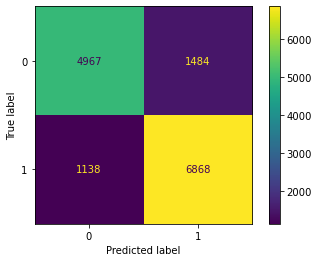

In [637]:
cm1 = confusion_matrix(y_test1, y_prediction_lr1, labels = pipe1.classes_)

ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = pipe.classes_).plot()
plt.show()


In [638]:
print(classification_report(y_test1, y_prediction_lr1))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      6451
           1       0.82      0.86      0.84      8006

    accuracy                           0.82     14457
   macro avg       0.82      0.81      0.82     14457
weighted avg       0.82      0.82      0.82     14457



## Cross-Validation

In [639]:
cross_val1 = cross_validate(pipe1, X_train1, y_train1, cv = 10)

In [640]:
cross_val1["test_score"]

array([0.81583953, 0.82016255, 0.81860626, 0.81843334, 0.8227257 ,
       0.81649948, 0.81425112, 0.81771013, 0.81511588, 0.81649948])

In [641]:
cross_val1["test_score"].mean()

0.8175843472557268

In [642]:
X1.shape

(72281, 9)

In [643]:
y1.shape

(72281,)

In [644]:
pipe1.predict_proba(X_test1)[5]

array([0.2651743, 0.7348257])

## Pickling

In [645]:
import pickle


In [646]:
# serializing the code for deployment

pickle.dump(pipe, open("PySpark_LR_test.pkl", "wb"))